In [278]:
import pandas as pd
import numpy as np

import json
import pprint

import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 50
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


c_id = "485d4ce5cc2948f5abbfd3c9271677f9"
c_se ="7dfca8010d314470b1d3d641c52052d8"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))
import pickle

In [231]:
file1 = pd.read_csv('Spotify_df.csv')
file2 = pd.read_csv('Hot100.csv')
def load_original_data():
    return pd.concat([file1], axis=0)
def load_orginal_data2():
    return pd.concat([file2], axis=0)

In [232]:
Spot=load_original_data()

In [233]:
Spot

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Where Love Lives (Come On In) - Classic Mix,Alison Limerick,0ilZMeXHPKDPjUc4Neu04f,0.708,0.566,11,-10.142,0,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,Passion - Naked Edit,Gat Decor,0ZBPWoRkfZ8SLcDJaFnkUu,0.710,0.625,5,-15.300,0,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,Good Life,Inner City,5sJiLlgQKBL81QCTOkoLB5,0.716,0.783,4,-12.876,0,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,U Don't Know Me (feat. Duane Harden),Armand Van Helden,0TN9m8rp3ZuNi4JwCKSans,0.742,0.756,10,-6.197,1,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,Free - Mood II Swing Remix,Sebastian Gamboa,2FrCwt008k0xqtCFH1VaTZ,0.726,0.907,5,-5.009,0,0.0894,0.000916,0.000521,0.2170,0.498,124.841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10265,Negativland,NEU!,2x0eC3SRcTwvGJxoXvhfcE,0.378,0.665,2,-11.604,1,0.0352,0.020300,0.858000,0.3180,0.512,110.074
10266,Rats,K-Holes,0339v0PaMmnpb7IOdGgnvJ,0.123,0.785,0,-2.621,1,0.0638,0.000001,0.757000,0.3980,0.139,169.221
10267,Mes,Murcof,4XjW9fcihP29h7fBAvXlDe,0.527,0.293,0,-16.701,0,0.1320,0.669000,0.841000,0.1040,0.127,105.008
10268,Dragonflies to Sew You Up,Prurient,2yr8zjsYtBAeZwpvQYC66k,0.498,0.995,3,-6.110,0,0.0493,0.008020,0.177000,0.2210,0.339,148.241


In [234]:
Hot100

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Harry Styles,As It Was,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930
1,Jack Harlow,First Class,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998
2,Glass Animals,Heat Waves,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870
3,Latto,Big Energy,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017
4,Imagine Dragons X JID,Enemy,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,0.555,77.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gunna Featuring Drake,P Power,0.828,0.591,1,-6.217,1,0.1090,0.0199,0.000323,0.3610,0.202,119.251
96,Yeat,Money So Big,0.693,0.575,2,-7.633,1,0.0906,0.1210,0.000000,0.1040,0.353,138.016
97,Coi Leray & Nicki Minaj,Blick Blick!,0.916,0.824,8,-4.444,0,0.4220,0.2220,0.001080,0.0661,0.870,139.926
98,Bailey Zimmerman,Fall In Love,0.524,0.643,9,-6.055,1,0.0297,0.4510,0.000000,0.2210,0.397,135.962


In [235]:
Hot100=load_orginal_data2()
Hot100
Hot100=Hot100.drop('Unnamed: 0', axis=1)
Hot100=Hot100.drop('songsby.1', axis=1)
Hot100=Hot100.drop('artist.1', axis=1)
Hot100=Hot100.drop('song.1', axis=1)

In [236]:
Hot100

,artist,song,songsby,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,origin
0,Harry Styles,As It Was,As It Was by Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4,1
1,Jack Harlow,First Class,First Class by Jack Harlow,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,173948,4,1
2,Glass Animals,Heat Waves,Heat Waves by Glass Animals,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805,4,1
3,Latto,Big Energy,Big Energy by Latto,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,173182,4,1
4,Imagine Dragons X JID,Enemy,Enemy by Imagine Dragons X JID,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,0.555,77.011,173381,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gunna Featuring Drake,P Power,P Power by Gunna Featuring Drake,0.828,0.591,1,-6.217,1,0.1090,0.0199,0.000323,0.3610,0.202,119.251,193347,4,1
96,Yeat,Money So Big,Money So Big by Yeat,0.693,0.575,2,-7.633,1,0.0906,0.1210,0.000000,0.1040,0.353,138.016,160052,4,1
97,Coi Leray & Nicki Minaj,Blick Blick!,Blick Blick! by Coi Leray & Nicki Minaj,0.916,0.824,8,-4.444,0,0.4220,0.2220,0.001080,0.0661,0.870,139.926,178413,4,1
98,Bailey Zimmerman,Fall In Love,Fall In Love by Bailey Zimmerman,0.524,0.643,9,-6.055,1,0.0297,0.4510,0.000000,0.2210,0.397,135.962,232059,4,1


In [237]:
Hot100=Hot100.drop('duration_ms', axis=1)

In [238]:
Hot100=Hot100.drop('time_signature', axis=1)
Hot100=Hot100.drop('origin', axis=1)

scaling dataframe

In [240]:
Hot_Num=Hot100.drop(columns=['song','artist'], axis=1)
Spot_Num=Spot.drop(columns=['artist', 'title', 'id'], axis=1)

In [241]:
scaler = StandardScaler()
scaler.fit(Spot_Num)
X_scaled = scaler.transform(Spot_Num)
X_scaled_df = pd.DataFrame(X_scaled, columns = Spot_Num.columns)
display(Spot_Num.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.708,0.566,11,-10.142,0,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,0.710,0.625,5,-15.300,0,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,0.716,0.783,4,-12.876,0,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,0.742,0.756,10,-6.197,1,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,0.726,0.907,5,-5.009,0,0.0894,0.000916,0.000521,0.2170,0.498,124.841


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.677781,-0.148877,1.612111,-0.093473,-1.263092,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812
1,0.688645,0.083142,-0.075507,-0.970588,-1.263092,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523
2,0.721235,0.704481,-0.356777,-0.558388,-1.263092,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879
3,0.862461,0.598303,1.330841,0.577372,0.791708,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708
4,0.775553,1.192114,-0.075507,0.779391,-1.263092,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311


In [242]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04,1.027000e+04
mean,-3.196837e-16,-4.877630e-16,1.268487e-16,-7.216990e-16,-4.971464e-16,-3.751192e-17,-4.496565e-17,7.707131e-16,-2.082776e-16,1.351078e-16,3.804595e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-3.167894e+00,-2.374606e+00,-1.481856e+00,-5.920045e+00,-1.263092e+00,-1.024490e+00,-9.212403e-01,-6.468230e-01,-1.158990e+00,-1.886432e+00,-4.122455e+00
25%,-6.258374e-01,-6.168474e-01,-9.193165e-01,-2.880944e-01,-1.263092e+00,-5.081537e-01,-8.565472e-01,-6.468134e-01,-5.836294e-01,-8.036715e-01,-7.619694e-01
50%,1.291751e-01,1.598262e-01,-7.550736e-02,2.530878e-01,7.917082e-01,-3.586496e-01,-4.456445e-01,-6.407110e-01,-4.064440e-01,2.607255e-02,-3.534411e-02
75%,7.429623e-01,7.949289e-01,7.683018e-01,6.470072e-01,7.917082e-01,1.547540e-02,7.395792e-01,5.548186e-01,2.404235e-01,8.297708e-01,5.670397e-01
max,2.193238e+00,1.557839e+00,1.612111e+00,1.780471e+00,7.917082e-01,1.144634e+01,2.086356e+00,2.213070e+00,5.731766e+00,1.804627e+00,3.357594e+00


In [243]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=11, random_state=1234)

In [244]:
kmeans.labels_

array([10,  0,  9, ...,  6,  1,  6], dtype=int32)

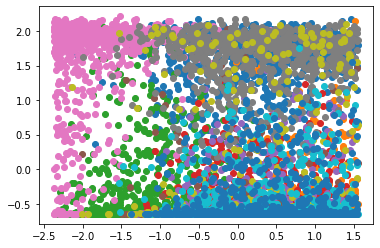

In [255]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X_scaled_df.to_numpy()[row_ix, 1], X_scaled_df.to_numpy()[row_ix, 7])
    # show the plot
pyplot.show()

In [256]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      703
1      985
2     1310
3     1376
4     1268
5      516
6      888
7      752
8      455
9     1114
10     903
dtype: int64

In [257]:
#X_df = pd.DataFrame(X)
X_scaled_df["cluster"] = clusters
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.677781,-0.148877,1.612111,-0.093473,-1.263092,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812,10
1,0.688645,0.083142,-0.075507,-0.970588,-1.263092,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523,0
2,0.721235,0.704481,-0.356777,-0.558388,-1.263092,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879,9
3,0.862461,0.598303,1.330841,0.577372,0.791708,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708,3
4,0.775553,1.192114,-0.075507,0.779391,-1.263092,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10265,-1.114694,0.240443,-0.919317,-0.342085,0.791708,-0.511071,-0.859944,1.809421,1.013852,0.018631,-0.310132,7
10266,-2.499789,0.712346,-1.481856,1.185469,0.791708,-0.093918,-0.921240,1.520283,1.576346,-1.369237,1.738377,1
10267,-0.305364,-1.222456,-1.481856,-1.208827,-1.263092,0.900832,1.098921,1.760754,-0.490818,-1.413887,-0.485589,6
10268,-0.462885,1.538176,-0.638047,0.592166,-1.263092,-0.305411,-0.897026,-0.140115,0.331829,-0.625072,1.011751,1


In [258]:
X_scaled_df[X_scaled_df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
6583,0.493102,-0.97864,0.768302,-0.307055,0.791708,-0.301036,1.434105,-0.645188,-0.455662,-0.993434,-1.522467,2


In [259]:
kmeans.inertia_

51439.94611165525

In [260]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

34386.36854326791


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

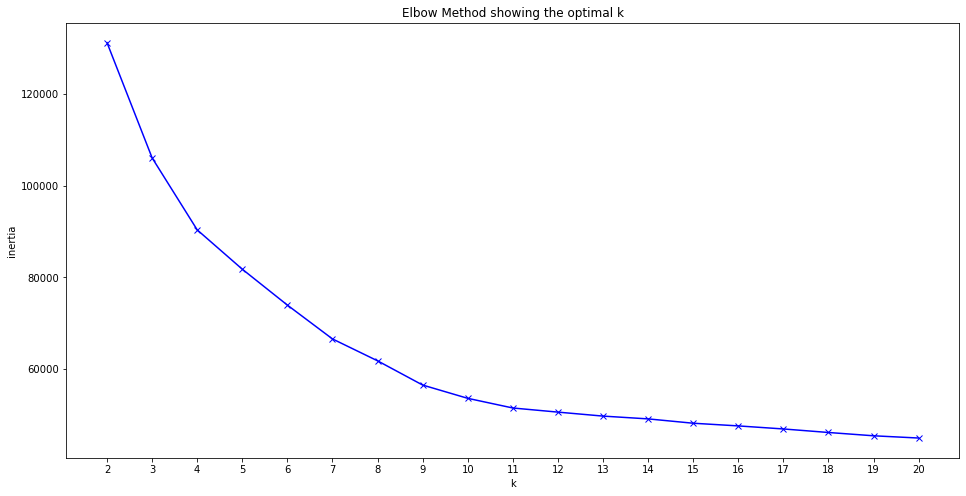

In [261]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [264]:
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.677781,-0.148877,1.612111,-0.093473,-1.263092,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812,10
1,0.688645,0.083142,-0.075507,-0.970588,-1.263092,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523,0
2,0.721235,0.704481,-0.356777,-0.558388,-1.263092,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879,9
3,0.862461,0.598303,1.330841,0.577372,0.791708,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708,3
4,0.775553,1.192114,-0.075507,0.779391,-1.263092,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10265,-1.114694,0.240443,-0.919317,-0.342085,0.791708,-0.511071,-0.859944,1.809421,1.013852,0.018631,-0.310132,7
10266,-2.499789,0.712346,-1.481856,1.185469,0.791708,-0.093918,-0.921240,1.520283,1.576346,-1.369237,1.738377,1
10267,-0.305364,-1.222456,-1.481856,-1.208827,-1.263092,0.900832,1.098921,1.760754,-0.490818,-1.413887,-0.485589,6
10268,-0.462885,1.538176,-0.638047,0.592166,-1.263092,-0.305411,-0.897026,-0.140115,0.331829,-0.625072,1.011751,1


In [265]:
X_scaled_df[X_scaled_df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
4410,0.444216,-1.080885,-1.481856,-0.267773,0.791708,-0.492109,0.630871,0.257808,-0.420506,-1.220404,0.45466,2


In [266]:
X_scaled_df['artist']= Spot['artist']

In [267]:
X_scaled_df['song']= Spot['title']

In [308]:
X_scaled_df['id']=Spot['id']

In [309]:
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,artist,song,id
0,0.677781,-0.148877,1.612111,-0.093473,-1.263092,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812,10,Alison Limerick,Where Love Lives (Come On In) - Classic Mix,0ilZMeXHPKDPjUc4Neu04f
1,0.688645,0.083142,-0.075507,-0.970588,-1.263092,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523,0,Gat Decor,Passion - Naked Edit,0ZBPWoRkfZ8SLcDJaFnkUu
2,0.721235,0.704481,-0.356777,-0.558388,-1.263092,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879,9,Inner City,Good Life,5sJiLlgQKBL81QCTOkoLB5
3,0.862461,0.598303,1.330841,0.577372,0.791708,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708,3,Armand Van Helden,U Don't Know Me (feat. Duane Harden),0TN9m8rp3ZuNi4JwCKSans
4,0.775553,1.192114,-0.075507,0.779391,-1.263092,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311,9,Sebastian Gamboa,Free - Mood II Swing Remix,2FrCwt008k0xqtCFH1VaTZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10265,-1.114694,0.240443,-0.919317,-0.342085,0.791708,-0.511071,-0.859944,1.809421,1.013852,0.018631,-0.310132,7,NEU!,Negativland,2x0eC3SRcTwvGJxoXvhfcE
10266,-2.499789,0.712346,-1.481856,1.185469,0.791708,-0.093918,-0.921240,1.520283,1.576346,-1.369237,1.738377,1,K-Holes,Rats,0339v0PaMmnpb7IOdGgnvJ
10267,-0.305364,-1.222456,-1.481856,-1.208827,-1.263092,0.900832,1.098921,1.760754,-0.490818,-1.413887,-0.485589,6,Murcof,Mes,4XjW9fcihP29h7fBAvXlDe
10268,-0.462885,1.538176,-0.638047,0.592166,-1.263092,-0.305411,-0.897026,-0.140115,0.331829,-0.625072,1.011751,1,Prurient,Dragonflies to Sew You Up,2yr8zjsYtBAeZwpvQYC66k


In [335]:
import spotipy 
import json
import random
from spotipy.oauth2 import SpotifyClientCredentials

In [336]:
Rec_input=input('Please name your favourite song! ')

Please name your favourite song! stay


In [337]:
id_extract



NameError: name 'id_extract' is not defined

In [411]:
from IPython.display import IFrame
def songrecommender():
    Rec_input=input('Please name your favourite song! ')
    if Hot100['song'].str.contains(Rec_input, na = False, case = False).any()== True:
        print("Do you like " + random.choice(Hot100['song']) + " too?")   
    else:
        result= sp.search(q=Rec_input, limit=1, market="GB")
        id_extract=sp.audio_features(result['tracks']['items'][0]['id']) 
        df=pd.json_normalize(id_extract)
        drop=df.drop(columns=['type','id','uri','analysis_url','time_signature'], axis=1)
        df_scaled=scaler.transform(drop)
        pred_audio_feat=kmeans.predict(df_scaled)
        cluster=X_scaled_df[X_scaled_df["cluster"]==pred_audio_feat[0]]
        recom = cluster.sample()
        track_id = recom['id'].values[0]
        display= IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",)
        return display


In [412]:

songrecommender()



Please name your favourite song! Hello


/Users/christinavonheydenaber/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- duration_ms
- track_href
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'https://api.spotify.com/v1/tracks/6HjvjMIsAee4GvlHhKXLKa'

In [384]:
result= sp.search(q=Rec_input, limit=1, market="GB")
        id_extract=sp.audio_features(result['tracks']['items'][0]['id']) 
        df=pd.json_normalize(id_extract)
        drop=df.drop(columns=['type','id','uri', 'track_href','analysis_url','time_signature'], axis=1)
        df_scaled=scaler.transform(drop)
        pred_audio_feat=kmeans.predict(df_scaled)
        cluster=X_scaled_df[X_scaled_df["cluster"]==pred_audio_feat[0]]
        recom = cluster.sample()
        track_id = recom['id'].values[0]
        display= IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",)
        return display
    print("Do you like this song too? " + random.choice(cluster)) 

AttributeError: 'list' object has no attribute 'drop'

In [386]:
track_id = "1v7L65Lzy0j0vdpRjJewt1"
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)


In [317]:
pred_audio_feat[0].item()

NameError: name 'pred_audio_feat' is not defined

In [318]:
results = sp.search(q="title:"+song+" artist:"+artist,limit=5)
        uri = results['tracks']['items'][0]["uri"]

        result_audio_feat = sp.audio_features(uri)

        result_audio_feat_df = pd.DataFrame(result_audio_feat)
        result_audio_feat_df = result_audio_feat_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

        result_scaled = scaler.transform(result_audio_feat_df) 

        recommendation = kmeans.predict(result_scaled)

        user_recommendation = audio_feat_all[(audio_feat_all["origin"] == 0) & (audio_feat_all["cluster"] == recommendation[0])].sample()

        print("The song you entered is not in the hottest 100. Ckeck out this song: \n"+ list(user_recommendation["song"])[0]+" by", list(user_recommendation["artist"])[0])

IndentationError: unexpected indent (3757276573.py, line 2)